In [7]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [8]:
#Read the dataset
df = pd.read_csv(r'C:\Users\hitgh\Downloads\creditcard\.venv\UCI_Credit_Card.csv')
df.shape

(30000, 25)

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [13]:
#Check Null Values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [14]:
#Check Duplicate Values
df.duplicated().sum()


np.int64(0)

In [15]:
#Check unique values
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [16]:
df = df.drop('ID', axis = 'columns')

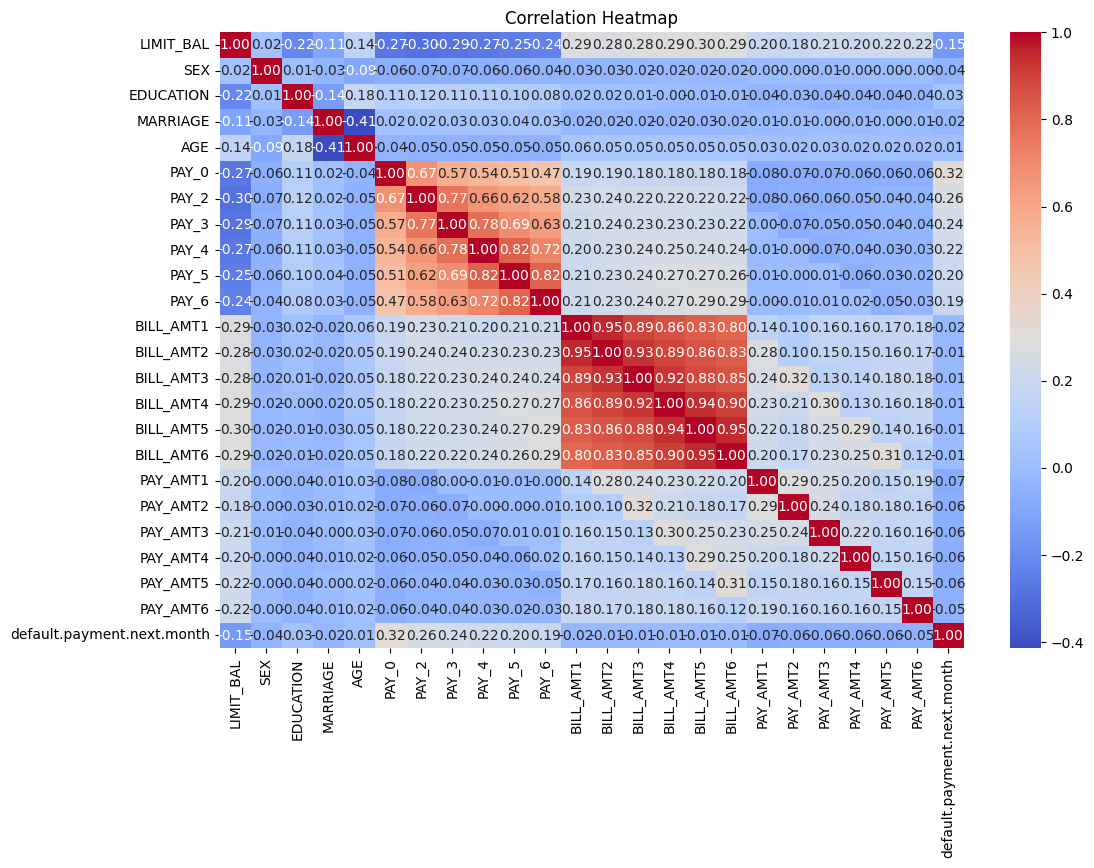

In [17]:
#Draw heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

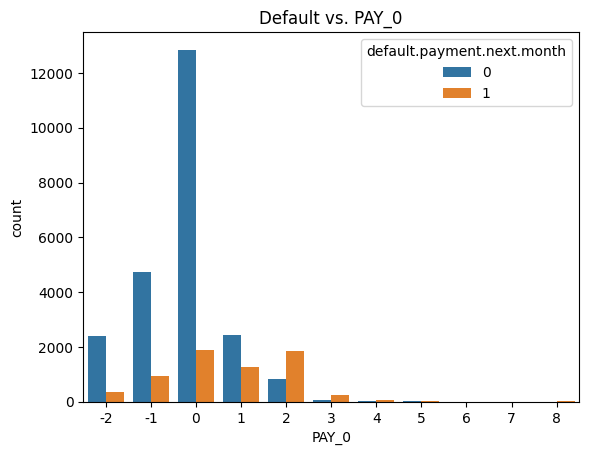

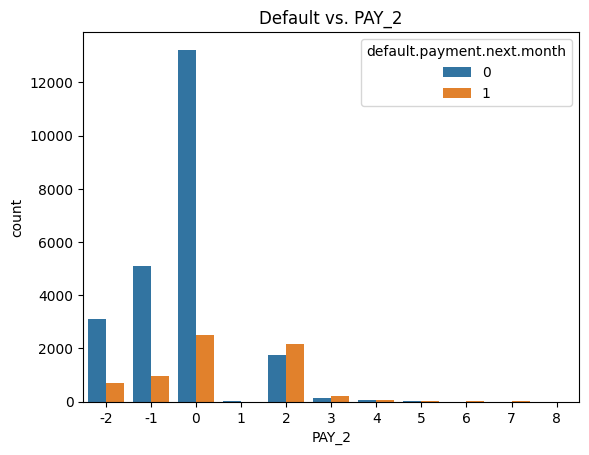

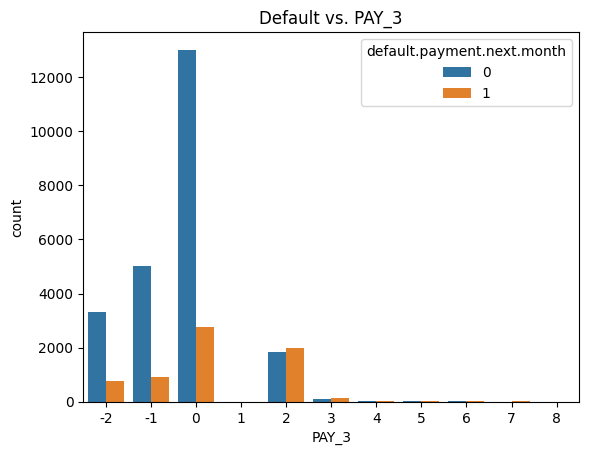

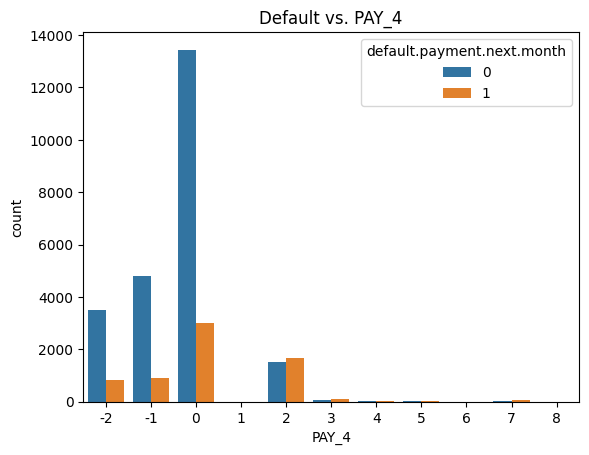

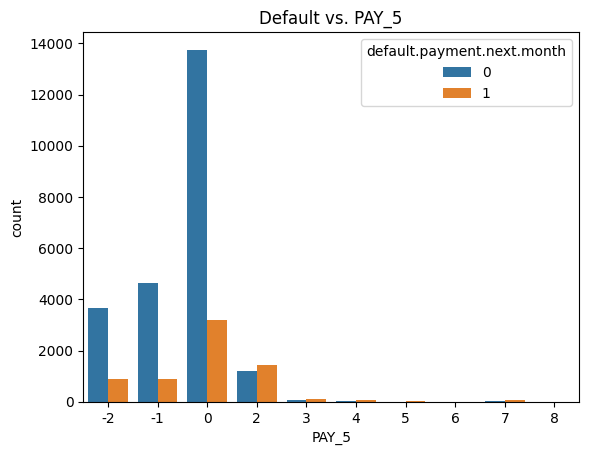

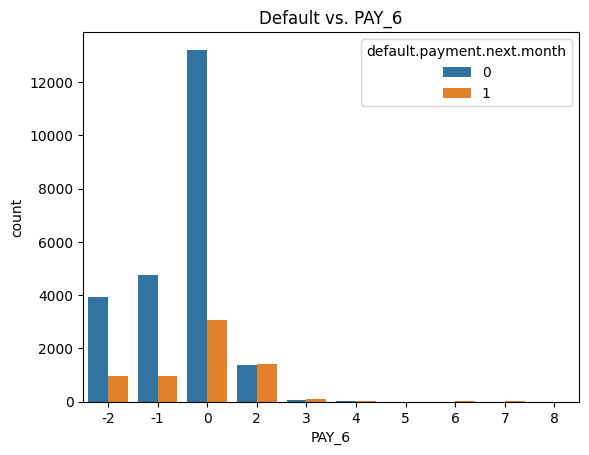

In [18]:
payment_history_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in payment_history_columns:
    sns.countplot(x=col, hue='default.payment.next.month', data=df)
    plt.title(f'Default vs. {col}')
    plt.show()

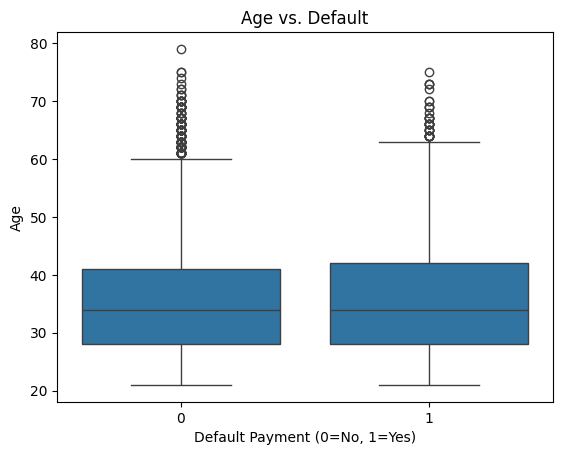

In [19]:
sns.boxplot(x='default.payment.next.month', y='AGE', data=df)
plt.title('Age vs. Default')
plt.xlabel('Default Payment (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

In [20]:
df['LIMIT_BAL'].value_counts().head(5)

LIMIT_BAL
50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: count, dtype: int64

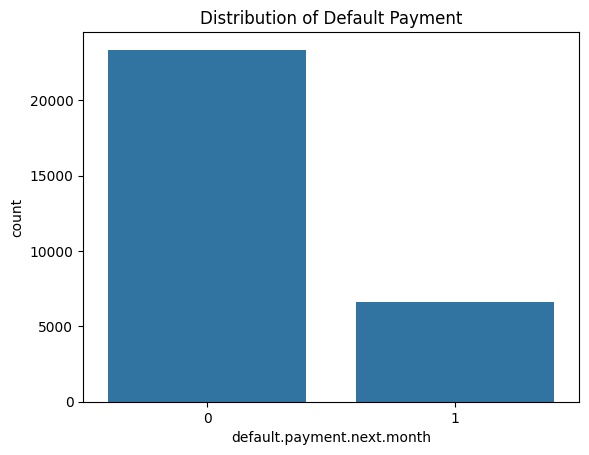

In [21]:
# Check the distribution of the target variable
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Distribution of Default Payment')
plt.show()

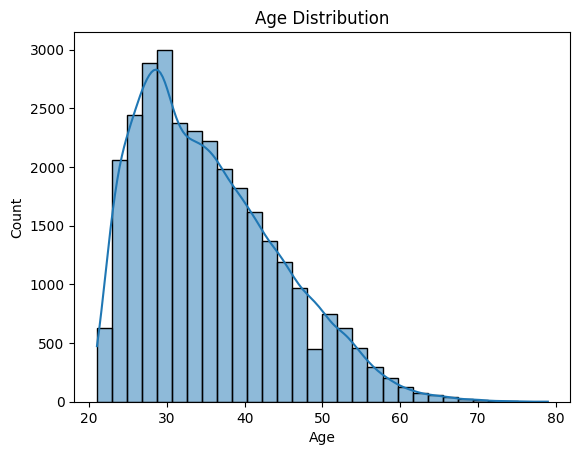

In [22]:
# Explore the distribution of features, e.g., age
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

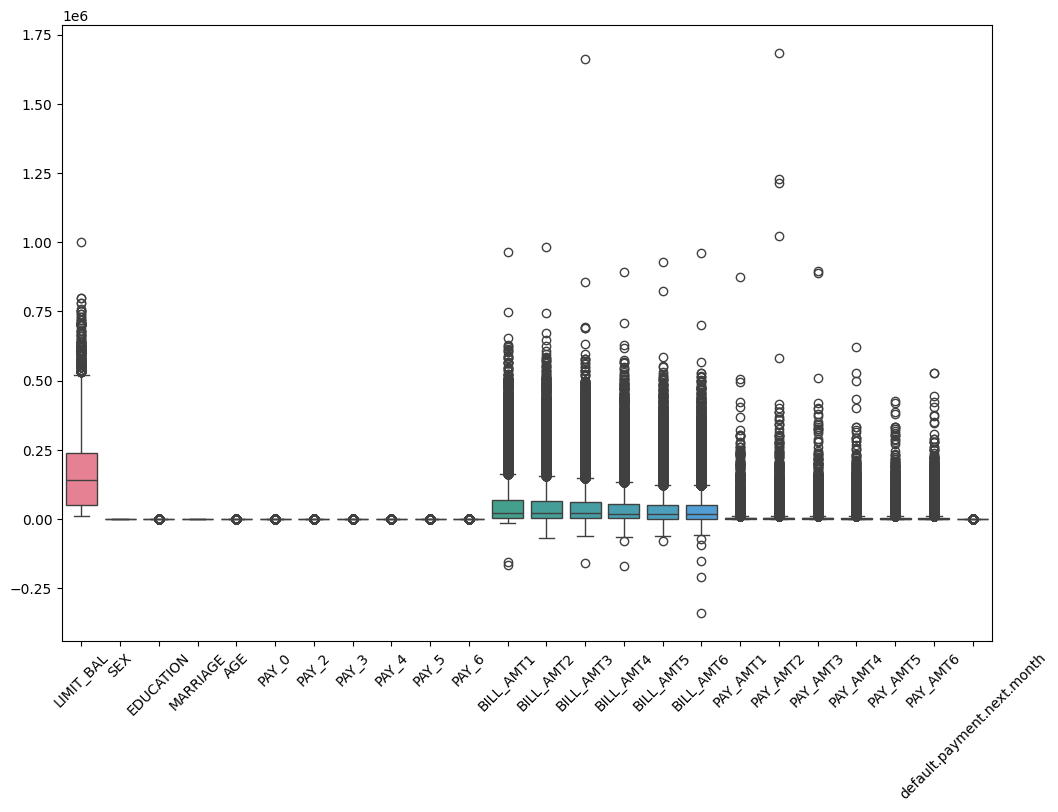

In [23]:
#Draw Boxplot to check outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [24]:
# Separate features and target variable
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 23)
(6000, 23)
(24000,)
(6000,)


In [26]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [27]:
#Check Feature Importance
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
PAY_0        0.649054
BILL_AMT1    0.364502
PAY_AMT2     0.249047
PAY_AMT1     0.171703
BILL_AMT2    0.125537
BILL_AMT3    0.120595
PAY_2        0.109360
LIMIT_BAL    0.106729
MARRIAGE     0.079040
EDUCATION    0.077808
PAY_3        0.076972
AGE          0.076778
BILL_AMT4    0.060790
SEX          0.056139
PAY_AMT4     0.055655
PAY_4        0.052052
PAY_AMT6     0.047620
BILL_AMT5    0.034406
BILL_AMT6    0.028835
PAY_AMT3     0.024774
PAY_AMT5     0.023396
PAY_5        0.022620
PAY_6        0.014968
dtype: float64


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_random = RandomForestClassifier()
model_random.fit(X_train_scaled, y_train)

y_pred_random = model_random.predict(X_test_scaled)

accuracy_random = accuracy_score(y_test, y_pred_random)
report_random = classification_report(y_test, y_pred_random)

print(f'Accuracy: {accuracy_random:.2f}')
print(report_random)


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [30]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


c:\Users\hitgh\Downloads\creditcard\.venv\Scripts\python.exe: No module named pip


In [31]:
from xgboost import XGBClassifier

In [32]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scaled, y_train)

y_pred_xgb = model_xgb.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Accuracy: {accuracy_xgb:.2f}')

Accuracy: 0.81


In [33]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_estimators": [200, 500, 800],
#     "max_depth": [4, 6, 8],
#     "learning_rate": [0.01, 0.05, 0.1]
# }

# grid = GridSearchCV(XGBClassifier(eval_metric="logloss"), param_grid, cv=3, scoring="roc_auc", n_jobs=-1)
# grid.fit(X_train_scaled, y_train)

# print("Best Parameters:", grid.best_params_)
# print("Best ROC-AUC:", grid.best_score_)


In [34]:
import pickle

In [35]:
pickle.dump(model_random, open('RandomForest_Model.pkl','wb'))